In [1]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt

In [2]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  activation = preactivation.clip(min=0)
  #activation = np.zeros_like(preactivation);

  return activation

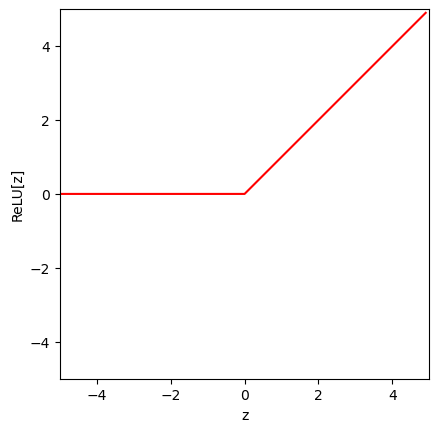

In [3]:
# Make an array of inputs
z = np.arange(-5,5,0.1)
RelU_z = ReLU(z)

# Plot the ReLU function
fig, ax = plt.subplots()
ax.plot(z,RelU_z,'r-')
ax.set_xlim([-5,5]);ax.set_ylim([-5,5])
ax.set_xlabel('z'); ax.set_ylabel('ReLU[z]')
ax.set_aspect('equal')
plt.show()

In [4]:
import numpy as np

# Define a shallow neural network with one input, one output, and three hidden units
def shallow_1_1_3(x, activation_fn, phi_0, phi_1, phi_2, phi_3, 
                   theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
    
    # Compute the preactivations (linear combinations before activation)
    pre_1 = theta_10 + theta_11 * x  # Equation for first hidden neuron
    pre_2 = theta_20 + theta_21 * x  # Equation for second hidden neuron
    pre_3 = theta_30 + theta_31 * x  # Equation for third hidden neuron

    # Apply the activation function (ReLU or any other provided)
    act_1 = activation_fn(pre_1)
    act_2 = activation_fn(pre_2)
    act_3 = activation_fn(pre_3)

    # Weight the activations using phi parameters
    w_act_1 = phi_1 * act_1
    w_act_2 = phi_2 * act_2
    w_act_3 = phi_3 * act_3

    # Combine the weighted activations and add phi_0 to compute the final output
    y = phi_0 + w_act_1 + w_act_2 + w_act_3

    # Return all computed values for analysis
    return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3


In [5]:
# Plot the shallow neural network.  We'll assume input in is range [0,1] and output [-1,1]
# If the plot_all flag is set to true, then we'll plot all the intermediate stages as in Figure 3.3
def plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=False, x_data=None, y_data=None):

  # Plot intermediate plots if flag set
  if plot_all:
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0,0].plot(x,pre_1,'r-'); ax[0,0].set_ylabel('Preactivation')
    ax[0,1].plot(x,pre_2,'b-'); ax[0,1].set_ylabel('Preactivation')
    ax[0,2].plot(x,pre_3,'g-'); ax[0,2].set_ylabel('Preactivation')
    ax[1,0].plot(x,act_1,'r-'); ax[1,0].set_ylabel('Activation')
    ax[1,1].plot(x,act_2,'b-'); ax[1,1].set_ylabel('Activation')
    ax[1,2].plot(x,act_3,'g-'); ax[1,2].set_ylabel('Activation')
    ax[2,0].plot(x,w_act_1,'r-'); ax[2,0].set_ylabel('Weighted Act')
    ax[2,1].plot(x,w_act_2,'b-'); ax[2,1].set_ylabel('Weighted Act')
    ax[2,2].plot(x,w_act_3,'g-'); ax[2,2].set_ylabel('Weighted Act')

    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y,plot_x].set_xlim([0,1]);ax[plot_x,plot_y].set_ylim([-1,1])
        ax[plot_y,plot_x].set_aspect(0.5)
      ax[2,plot_y].set_xlabel('Input, $x$');
    plt.show()

  fig, ax = plt.subplots()
  ax.plot(x,y)
  ax.set_xlabel('Input, $x$'); ax.set_ylabel('Output, $y$')
  ax.set_xlim([0,1]);ax.set_ylim([-1,1])
  ax.set_aspect(0.5)
  if x_data is not None:
    ax.plot(x_data, y_data, 'mo')
    for i in range(len(x_data)):
      ax.plot(x_data[i], y_data[i],)
  plt.show()

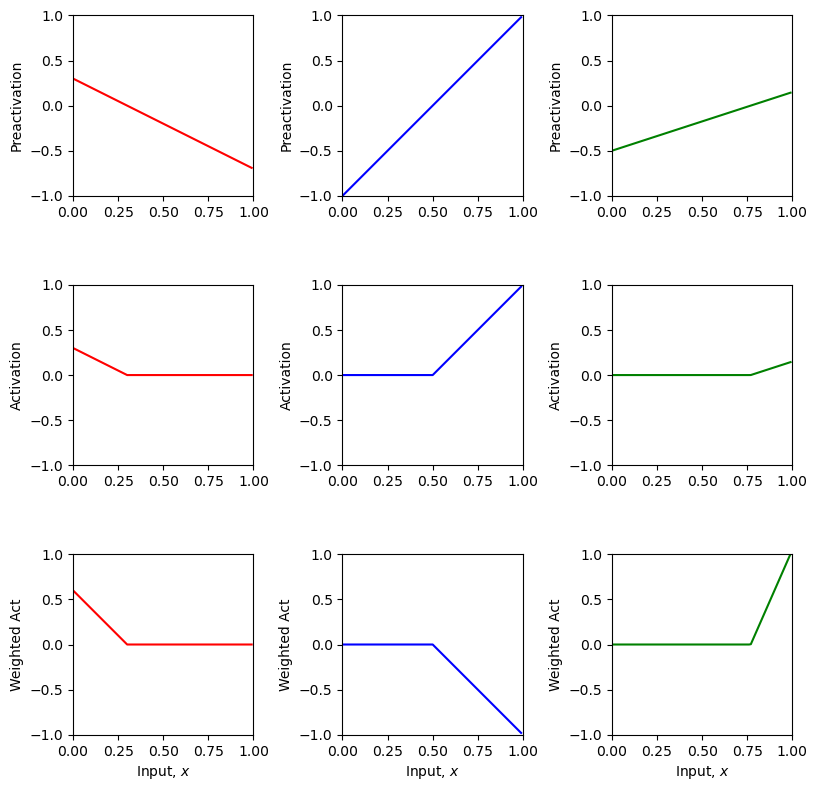

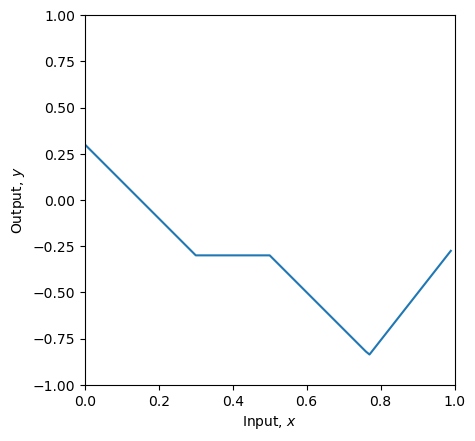

In [8]:
# Now lets define some parameters and run the neural network
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

If your code is correct, then the final output should look like this:


Now let's play with the parameters to make sure we understand how they work.  The original  parameters were:

$\theta_{10} =  0.3$ ; $\theta_{11} = -1.0$<br>
$\theta_{20} =  -1.0$ ; $\theta_{21} = 2.0$<br>
$\theta_{30} =  -0.5$ ; $\theta_{31} = 0.65$<br>
$\phi_0 = -0.3; \phi_1 = 2.0; \phi_2 = -1.0; \phi_3 = 7.0$

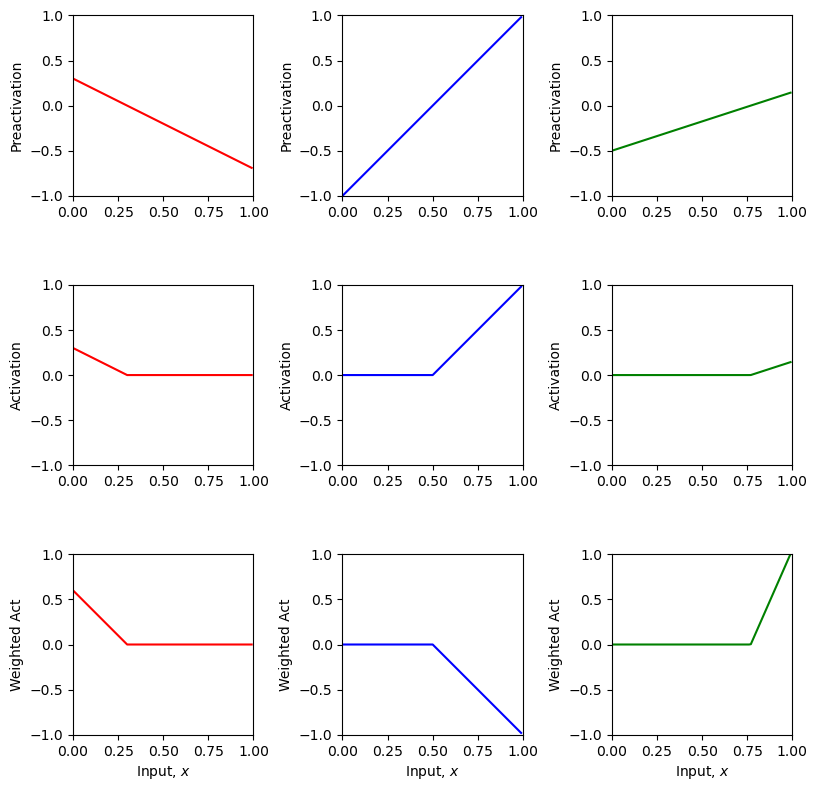

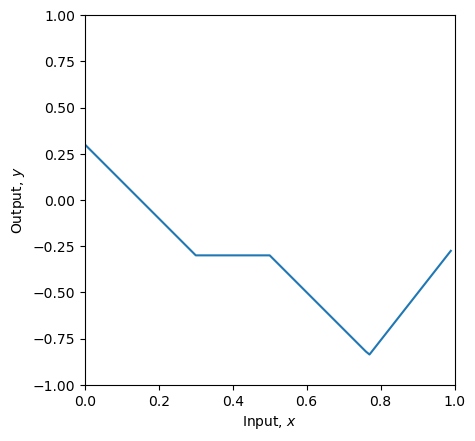

In [70]:
#TODO
# 1. Predict what effect changing phi_0 will have on the network.
# This changes where the non active neurons would be on the y axis. (straight lines on y=phi_0 line where there are no neurons active)

# 2. Predict what effect multiplying phi_1, phi_2, phi_3 by 0.5 would have.  Check if you are correct
# This changes the width of the active neuron lines by halfing them

# 3. Predict what effect multiplying phi_1 by -1 will have.  Check if you are correct.
# The first weighted activation flips over (reflects in y=0)

# 4. Predict what effect setting theta_20 to -1.2 will have.  Check if you are correct.
# This changes the y-intercept of this second plot and so increases the place where the joint is in the activation plot.

# 5. Change the parameters so that there are only two "joints" (including outside the range of the plot)
# There are actually three ways to do this. See if you can figure them all out
# change phi_1, phi_2 or phi_3 to zero 

# 6. With the original parameters, the second line segment is flat (i.e. has slope zero)
# How could you change theta_10 so that all of the segments have non-zero slopes
# Change it to 0.5, (joint for the second plot, y=2x-1 => 2x-1=0 => 2x=1 => x=1/2)

# 7. What do you predict would happen if you multiply theta_20 and theta21 by 0.5, and phi_2 by 2.0?
# Check if you are correct.
# This halfs the y-intercept, the gradient and the joint. phi_2*2 gives the slope of the weighted function as steeper 

# 8. What do you predict would happen if you multiply theta_20 and theta21 by -0.5, and phi_2 by -2.0?
# Check if you are correct.
# still halfs but flips everything. the slope of the weighted function is also steeper.


theta_10 =  0.3 # y-intercept of first plot
; theta_11 = -1 # gradient of first plot 
theta_20 = -1 # y-intercept of second plot
; theta_21 = 2 # gradient of second plot
theta_30 = -0.5  # y-intercept of third plot 
; theta_31 = 0.65 # gradient of third plot 
phi_0 = -0.3; 
phi_1 = 2; 
phi_2 = -1; phi_3 = 7

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1, phi_2,phi_3, theta_10,theta_11,theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

# Least squares loss

# Now let's consider fitting the network to data.  First we need to define the loss function.  We'll use the least squares loss:

\begin{equation}
L[\boldsymbol\phi] = \sum_{i=1}^{I}(y_{i}-\text{f}[x_{i},\boldsymbol\phi])^2
\end{equation}

where $(x_i,y_i)$ is an input/output training pair and $\text{f}[\bullet,\boldsymbol\phi]$ is the neural network with parameters $\boldsymbol\phi$.  The first term in the brackets is the ground truth output and the second term is the prediction of the model

In [9]:
import numpy as np

# Least squares function
def least_squares_loss(y_train, y_predict):
    # Compute the sum of squared differences
    loss = np.sum((y_train - y_predict) ** 2)
    return loss


In [10]:
import numpy as np

# Define the Least Squares Loss function
def least_squares_loss(y_train, y_predict):
    # Compute the squared differences
    squared_differences = (y_train - y_predict) ** 2
    
    # Sum them up
    loss = np.sum(squared_differences)
    
    return loss


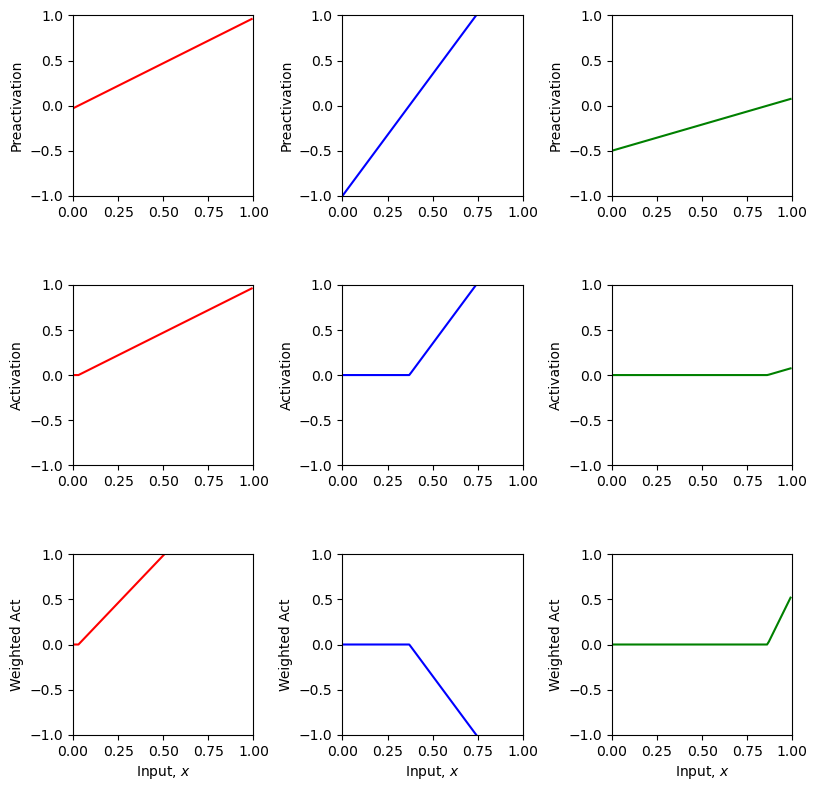

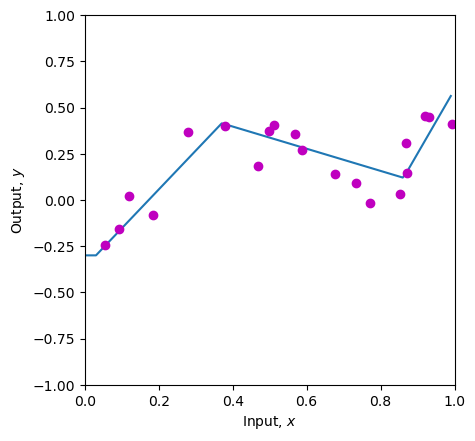

Your Loss = 0.236, True value = 9.385


In [11]:
# Now lets define some parameters, run the neural network, and compute the loss
theta_10 =  -0.03 ; theta_11 = 1.0
theta_20 = -1.0  ; theta_21 = 2.7
theta_30 = -0.5  ; theta_31 = 0.58
phi_0 = -0.3; phi_1 = 2.1; phi_2 = -1.0; phi_3 = 7.0

# Define a range of input values
x = np.arange(0,1,0.01)

x_train = np.array([0.09291784,0.46809093,0.93089486,0.67612654,0.73441752,0.86847339,\
                   0.49873225,0.51083168,0.18343972,0.99380898,0.27840809,0.38028817,\
                   0.12055708,0.56715537,0.92005746,0.77072270,0.85278176,0.05315950,\
                   0.87168699,0.58858043])
y_train = np.array([-0.15934537,0.18195445,0.451270150,0.13921448,0.09366691,0.30567674,\
                    0.372291170,0.40716968,-0.08131792,0.41187806,0.36943738,0.3994327,\
                    0.019062570,0.35820410,0.452564960,-0.0183121,0.02957665,-0.24354444, \
                    0.148038840,0.26824970])

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True, x_data = x_train, y_data = y_train)

# Run the neural network on the training data
y_predict, *_ = shallow_1_1_3(x_train, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

# Compute the least squares loss and print it out
loss = least_squares_loss(y_train,y_predict)
print('Your Loss = %3.3f, True value = 9.385'%(loss))

# TODO.  Manipulate the parameters (by hand!) to make the function
# fit the data better and try to reduce the loss to as small a number
# as possible.  The best that I could do was 0.181
# Tip... start by manipulating phi_0.
# It's not that easy, so don't spend too much time on this!
